In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-3.txt")

In [3]:
evt_x.max()

333.47577029952066

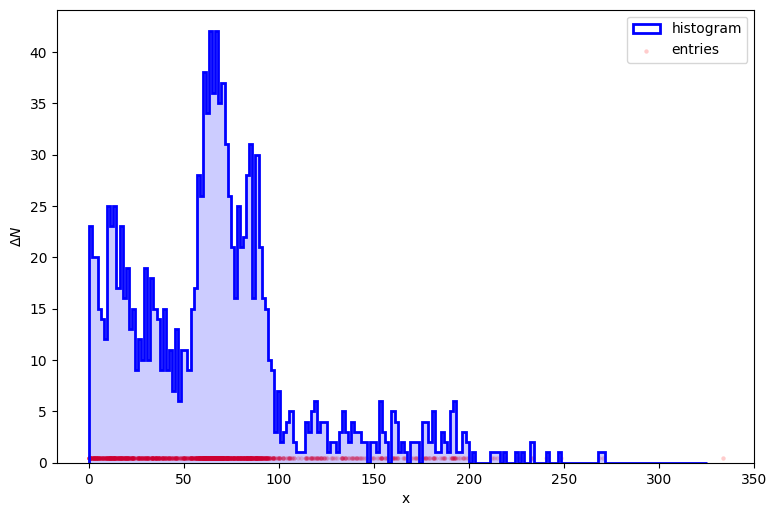

In [4]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 200
x_range = (0, 325)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 0.5), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [5]:
#bins

In [6]:
data_x = (bins+(bins[1]-bins[0])/2)[:-1]
#print(data_x)
#print

In [7]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

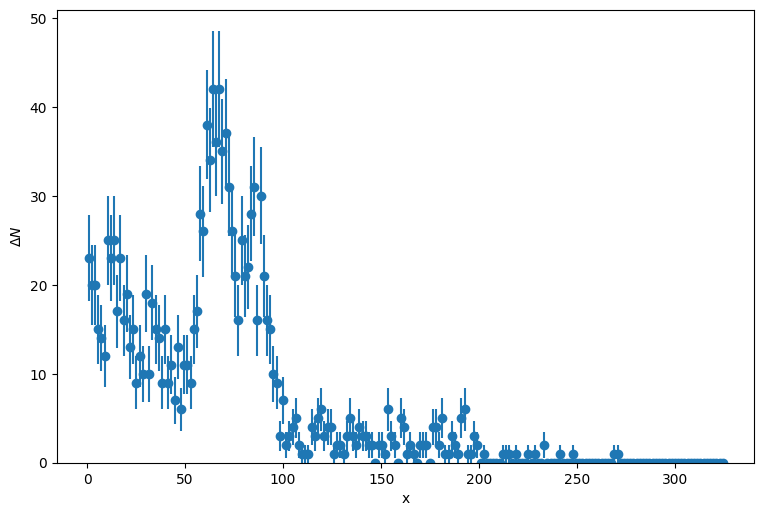

In [8]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [9]:
def bkg_pdf(x, par):
    return np.exp(-x/par[0])/par[0]
def sig_pdf(x, par):
    return np.exp(-((x-par[0])/par[1])**2/2)/math.sqrt(2*math.pi*par[1]**2)
def bkg_model(x, par):
    return par[0]*bkg_pdf(x, par[1:])
def sig_model(x, par):
    return par[0]*sig_pdf(x, par[2::2])+par[1]*sig_pdf(x, par[3::2])
def fit_model(x, par):
    return bkg_model(x, par)+sig_model(x, par[2:])

In [10]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, (1000,100,300,300,70,80,1,1), name=("B", "$\lambda$", "S","S2", "$\mu$", "$\mu_2$","$\sigma$","$\sigma_2$"))

In [11]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 117.1                      │              Nfcn = 508              │
│ EDM = 8.72e-10 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B          │  1.22e3   │  0.06e3   │            │            │         │         │       │
│ 1 │ $\lambda$  │    61     │     4     │            │            │         │         │       │
│ 2 │ S          │    560    │    50     │            │            │         │         │       │
│ 3 │ S2         │    280    │    40     │            │            │         │         │       │
│ 4 │ $\mu$      │   66.2    │    0.7    │            │            │         │         │       │
│ 5 │ $\mu_2$    │   85.8    │    1.0    │            │            │         │         │       │
│ 6 │ $\sigma$   │    6.4    │    0.6    │            │            │         │         │       │
│ 7 │ $\sigma_2$ │    5.5    │    0.7    │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬─────────────────────────────────────────────────────────────────────────────────────────┐
│            │          B  $\lambda$          S         S2      $\mu$    $\mu_2$   $\sigma$ $\sigma_2$ │
├────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│          B │   3.07e+03       58.4       -546       -286       1.78      -2.94      -4.04      -2.98 │
│  $\lambda$ │       58.4         13      -6.95      -18.9     0.0346    -0.0584    0.00163     -0.237 │
│          S │       -546      -6.95   2.17e+03       -760       12.1       22.9       15.3      -13.5 │
│         S2 │       -286      -18.9       -760   1.45e+03      -13.7      -20.2      -11.5       15.8 │
│      $\mu$ │       1.78     0.0346       12.1      -13.7      0.441      0.374      0.184     -0.235 │
│    $\mu_2$ │      -2.94    -0.0584       22.9      -20.2      0.374      0.905      0.318     -0.372 │
│   $\sigma$ │      -4.04    0.00163       15.3      -11.5      0.184      0.318      0.316     -0.179 │
│ $\sigma_2$ │      -2.98     -0.237      -13.5       15.8     -0.235     -0.372     -0.179      0.431 │
└────────────┴─────────────────────────────────────────────────────────────────────────────────────────┘

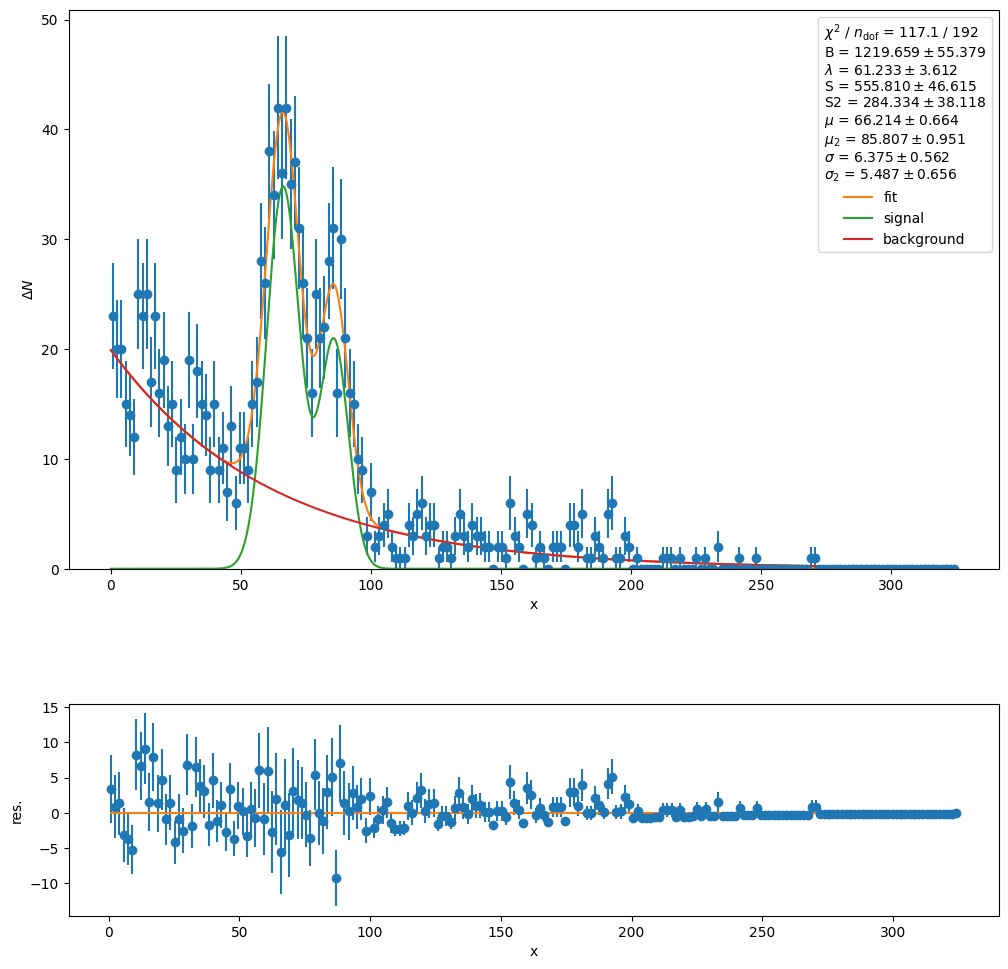

In [12]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, m.values)
bkg_y_f = bkg_model(data_x_f, m.values)
sig_y_f = sig_model(data_x_f, m.values[2:])

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, m.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()
plt.show()